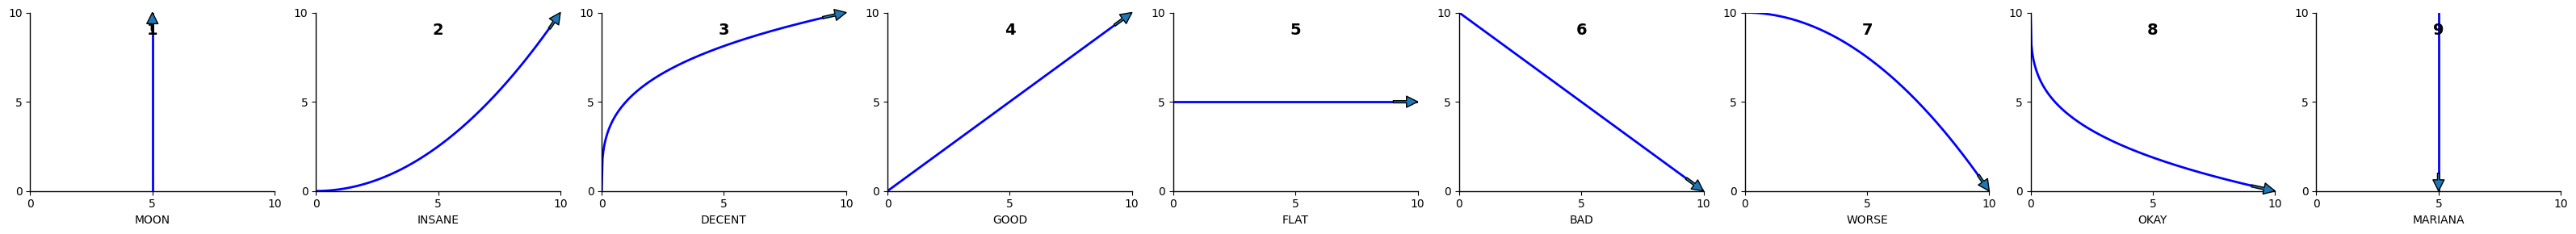

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1     # length of arrow tail
ARROW_HEAD = 10
ARROW_WIDTH = 2

# ============================================================
# 2. PREPARE DATA
# ============================================================
x_up = np.linspace(0, 10, 300)
x_down = np.linspace(0, 10, 300)

# f(x) functions
y_insane = 10 * (x_up / 10)**2
y_decent = 10 * (x_up / 10)**0.3
y_good   = x_up
y_flat   = np.full_like(x_up, 5)
y_bad    = 10 - x_down
y_worse  = 10 * (1 - (x_down / 10)**2)
y_okay   = 10 * (1 - (x_down / 10)**0.3)

labels = [
    "MOON", "INSANE", "DECENT", "GOOD",
    "FLAT", "BAD", "WORSE", "OKAY", "MARIANA"
]

ys = [
    None,       # MOON
    y_insane,
    y_decent,
    y_good,
    y_flat,
    y_bad,
    y_worse,
    y_okay,
    None        # MARIANA
]

# ============================================================
# 3. AXIS STYLE
# ============================================================
def draw_axes(ax):
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([0, 5, 10])
    ax.set_yticks([0, 5, 10])

# ============================================================
# 4. PLOT
# ============================================================
plt.figure(figsize=(32, 3))

for i in range(9):
    ax = plt.subplot(1, 9, i + 1)
    draw_axes(ax)
    label = labels[i]

    # -------------------------
    # MOON (vertical up)
    # -------------------------
    if label == "MOON":
        ax.plot([5, 5], [0, 10], color="blue", linewidth=2)
        ax.annotate("",
                    xy=(5, 10),
                    xytext=(5, 10 - ARROW_TAIL),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # -------------------------
    # MARIANA (vertical down)
    # -------------------------
    elif label == "MARIANA":
        ax.plot([5, 5], [0, 10], color="blue", linewidth=2)
        ax.annotate("",
                    xy=(5, 0),
                    xytext=(5, 0 + ARROW_TAIL),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # -------------------------
    # NORMAL CURVES
    # -------------------------
    else:
        y = ys[i]
        ax.plot(x_up, y, color="blue", linewidth=2)

        # Compute slope at the last point (tangent)
        dx = x_up[-1] - x_up[-2]
        dy = y[-1] - y[-2]

        # Normalize tail length to ARROW_TAIL
        length = np.sqrt(dx**2 + dy**2)
        tail_dx = -ARROW_TAIL * dx / length
        tail_dy = -ARROW_TAIL * dy / length

        # For flat line, ensure horizontal arrow
        if np.isclose(dy, 0):
            tail_dx = -ARROW_TAIL
            tail_dy = 0

        # For vertical line (e.g., theoretical edge cases)
        if np.isclose(dx, 0):
            tail_dx = 0
            tail_dy = -ARROW_TAIL if dy > 0 else ARROW_TAIL

        # Draw arrow at end of curve along tangent
        ax.annotate("",
                    xy=(x_up[-1], y[-1]),
                    xytext=(x_up[-1] + tail_dx, y[-1] + tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # Title + number
    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5, 0.9, str(i + 1),
            transform=ax.transAxes,
            ha='center', va='center',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


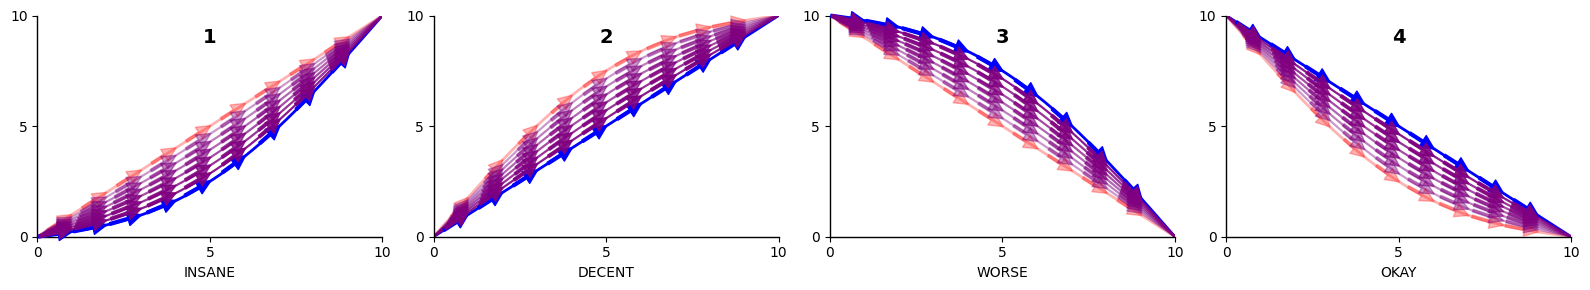

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 6    # number of intermediate (random) lines per subplot
POINTS = 200      # resolution for plotted curves

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0, linewidth=2, directional=False):
    x_vals = np.asarray(x_vals)
    y_vals = np.asarray(y_vals)
    ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, alpha=alpha)

    # Add end-point arrow (original behavior)
    if len(x_vals) >= 2:
        idx = -1
        if np.isclose(x_vals[-1], x_vals[-2]) and np.isclose(y_vals[-1], y_vals[-2]):
            idx = -2

        dx = x_vals[-1] - x_vals[idx]
        dy = y_vals[-1] - y_vals[idx]
        length = np.hypot(dx, dy)
        if length == 0:
            tail_dx, tail_dy = 0, 0
        else:
            tail_dx = -ARROW_TAIL * dx / length
            tail_dy = -ARROW_TAIL * dy / length

        ax.annotate("",
                    xy=(x_vals[-1], y_vals[-1]),
                    xytext=(x_vals[-1] + tail_dx, y_vals[-1] + tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD,
                                    color=color,
                                    alpha=alpha))

    # Add directional arrows along the curve
    if directional:
        step = max(1, len(x_vals)//10)  # plot 10 arrows along curve
        for j in range(0, len(x_vals)-step, step):
            dx = x_vals[j+step] - x_vals[j]
            dy = y_vals[j+step] - y_vals[j]
            length = np.hypot(dx, dy)
            if length == 0:
                continue
            tail_dx = -ARROW_TAIL * dx / length
            tail_dy = -ARROW_TAIL * dy / length
            ax.annotate("",
                        xy=(x_vals[j+step], y_vals[j+step]),
                        xytext=(x_vals[j+step] + tail_dx, y_vals[j+step] + tail_dy),
                        arrowprops=dict(width=ARROW_WIDTH,
                                        headwidth=ARROW_HEAD,
                                        headlength=ARROW_HEAD,
                                        color=color,
                                        alpha=alpha))

def draw_axes(ax):
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([0, 5, 10])
    ax.set_yticks([0, 5, 10])

def make_linear_line(x0, y0, x1, y1, pts=POINTS):
    x = np.linspace(x0, x1, pts)
    y = np.linspace(y0, y1, pts)
    return x, y

def bulge_curve(x, y_start, y_end, bulge_strength=1.0, side="right"):
    x = np.asarray(x)
    t = (x - x[0]) / (x[-1] - x[0])
    linear = y_start + (y_end - y_start) * t
    amp = bulge_strength * (y_end - y_start if abs(y_end - y_start) > 0 else 1.0) * 0.25
    sign = 1.0 if side == "right" else -1.0
    bulge = sign * amp * np.sin(np.pi * t)
    return linear + bulge

def interpolate_array_lines(xa, ya, xb, yb, n=NUM_RANDOM):
    xa = np.asarray(xa)
    ya = np.asarray(ya)
    xb = np.asarray(xb)
    yb = np.asarray(yb)

    if xa.size == 2:
        xA, yA = make_linear_line(xa[0], ya[0], xa[1], ya[1], pts=POINTS)
    else:
        xA = np.linspace(xa[0], xa[-1], POINTS)
        yA = np.interp(xA, xa, ya)

    if xb.size == 2:
        xB, yB = make_linear_line(xb[0], yb[0], xb[1], yb[1], pts=POINTS)
    else:
        xB = np.linspace(xb[0], xb[-1], POINTS)
        yB = np.interp(xB, xb, yb)

    common_x = np.linspace(0, 10, POINTS)
    yA_resampled = np.interp(common_x, xA, yA)
    yB_resampled = np.interp(common_x, xB, yB)

    lines = []
    for i in range(n):
        t = (i + 1) / (n + 1)
        x_vals = common_x
        y_vals = (1 - t) * yA_resampled + t * yB_resampled
        lines.append((x_vals, y_vals))
    return lines

# ============================================================
# 3. BUILD & PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(16, 3))
labels = ["INSANE", "DECENT", "WORSE", "OKAY"]

for i, label in enumerate(labels):
    ax = plt.subplot(1, 4, i + 1)
    draw_axes(ax)
    x_grid = np.linspace(0, 10, POINTS)

    def plot_intermediates(xA, yA, xB, yB):
        lines = interpolate_array_lines(xA, yA, xB, yB, n=NUM_RANDOM)
        for idx, (xx, yy) in enumerate(lines):
            t = (idx + 1) / (NUM_RANDOM + 1)
            alpha = t * 1.0 + (1 - t) * 0.3  # closer to blue = higher alpha
            plot_line_with_arrow(ax, xx, yy, "purple", alpha=alpha, linewidth=1.6, directional=True)

    # -------------------------
    # DECENT
    # -------------------------
    if label == "DECENT":
        x_red = x_grid
        y_red = x_grid
        plot_line_with_arrow(ax, x_red, y_red, "blue", alpha=1.0, directional=True)

        y_blue = bulge_curve(x_grid, 0, 10, bulge_strength=1.0, side="right")
        plot_line_with_arrow(ax, x_grid, y_blue, "red", alpha=0.3, directional=True)

        plot_intermediates(x_grid, y_blue, x_red, y_red)

    # -------------------------
    # INSANE
    # -------------------------
    elif label == "INSANE":
        x_blue = x_grid
        y_blue = x_grid
        plot_line_with_arrow(ax, x_blue, y_blue, "red", alpha=0.3, directional=True)

        y_red = bulge_curve(x_grid, 0, 10, bulge_strength=1.0, side="left")
        plot_line_with_arrow(ax, x_grid, y_red, "blue", alpha=1.0, directional=True)

        plot_intermediates(x_blue, y_blue, x_grid, y_red)

    # -------------------------
    # OKAY
    # -------------------------
    elif label == "OKAY":
        x_red = x_grid
        y_red = 10 - x_grid
        plot_line_with_arrow(ax, x_red, y_red, "blue", alpha=1.0, directional=True)

        y_blue = bulge_curve(x_grid, 10, 0, bulge_strength=1.0, side="right")
        plot_line_with_arrow(ax, x_grid, y_blue, "red", alpha=0.3, directional=True)

        plot_intermediates(x_grid, y_blue, x_red, y_red)

    # -------------------------
    # WORSE
    # -------------------------
    elif label == "WORSE":
        x_blue = x_grid
        y_blue = 10 - x_grid
        plot_line_with_arrow(ax, x_blue, y_blue, "red", alpha=0.3, directional=True)

        y_red = bulge_curve(x_grid, 10, 0, bulge_strength=1.0, side="left")
        plot_line_with_arrow(ax, x_grid, y_red, "blue", alpha=1.0, directional=True)

        plot_intermediates(x_blue, y_blue, x_grid, y_red)

    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5, 0.9, str(i + 1),
            transform=ax.transAxes,
            ha='center', va='center',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


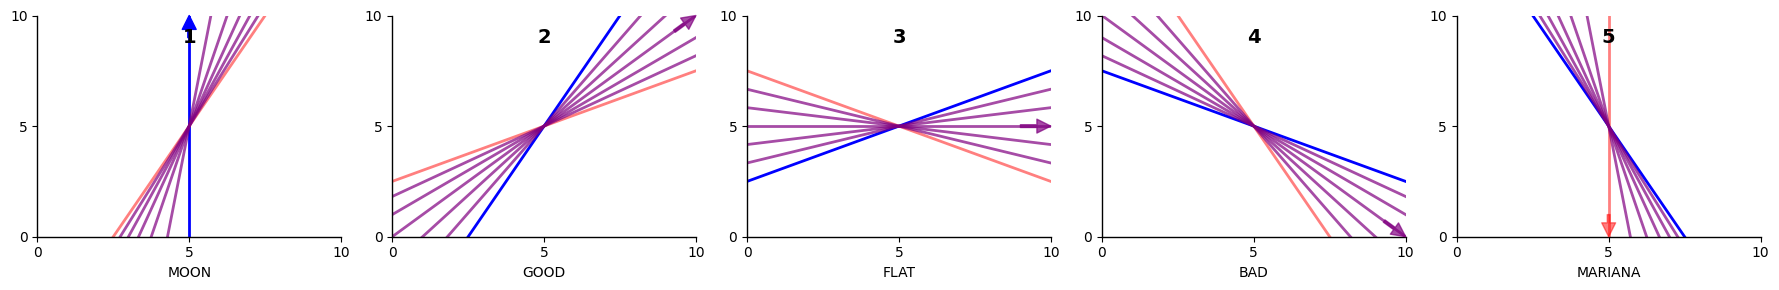

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5  # number of intermediate lines per subplot

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def extend_line_to_grid(x, y, xlim=(0, 10), ylim=(0, 10)):
    """Extend a line (x[0],y[0]) to (x[1],y[1]) until it hits the plot boundary."""
    x0, x1 = x
    y0, y1 = y
    dx = x1 - x0
    dy = y1 - y0

    t_values = []

    if dx != 0:
        t_x0 = (xlim[0] - x0) / dx
        t_x1 = (xlim[1] - x0) / dx
        t_values.extend([t_x0, t_x1])
    if dy != 0:
        t_y0 = (ylim[0] - y0) / dy
        t_y1 = (ylim[1] - y0) / dy
        t_values.extend([t_y0, t_y1])

    # Only keep t between 0 and 1 to avoid reversing
    t_valid = [t for t in t_values if 0 <= t <= 1 or t < 0 or t > 1]

    # Get new extended points
    t_min = min(t_values)
    t_max = max(t_values)
    new_x = [x0 + dx * t_min, x0 + dx * t_max]
    new_y = [y0 + dy * t_min, y0 + dy * t_max]
    return new_x, new_y

def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0):
    """Plot a line with an arrow at the end following its direction."""
    ax.plot(x_vals, y_vals, color=color, linewidth=2, alpha=alpha)
    dx = x_vals[-1] - x_vals[-2]
    dy = y_vals[-1] - y_vals[-2]
    length = np.sqrt(dx**2 + dy**2)
    tail_dx = -ARROW_TAIL * dx / length if length != 0 else 0
    tail_dy = -ARROW_TAIL * dy / length if length != 0 else 0
    ax.annotate("",
                xy=(x_vals[-1], y_vals[-1]),
                xytext=(x_vals[-1] + tail_dx, y_vals[-1] + tail_dy),
                arrowprops=dict(width=ARROW_WIDTH,
                                headwidth=ARROW_HEAD,
                                headlength=ARROW_HEAD,
                                color=color,
                                alpha=alpha))

def draw_axes(ax):
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([0, 5, 10])
    ax.set_yticks([0, 5, 10])

def interpolate_lines(x_start, y_start, x_end, y_end, num_lines=NUM_RANDOM):
    """Generate intermediate lines between two reference lines."""
    lines = []
    for i in range(num_lines):
        t = (i + 1) / (num_lines + 1)
        x_vals = (1 - t) * np.array(x_start) + t * np.array(x_end)
        y_vals = (1 - t) * np.array(y_start) + t * np.array(y_end)
        lines.append((x_vals, y_vals))
    return lines

# ============================================================
# 3. PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(32, 3))

for i, label in enumerate([
    "MOON", "GOOD",
    "FLAT", "BAD", "MARIANA"
]):
    ax = plt.subplot(1, 9, i + 1)
    draw_axes(ax)

    if label == "MOON":
        x_blue, y_blue = extend_line_to_grid([5, 5], [0, 10])
        x_red, y_red = extend_line_to_grid([2.5, 7.5], [0, 10])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=1.0)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=0.5)
        for x_vals, y_vals in interpolate_lines(x_blue, y_blue, x_red, y_red):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=0.7)

    elif label == "GOOD":
        x_blue, y_blue = extend_line_to_grid([2.5, 7.5], [0, 10])
        x_red, y_red = extend_line_to_grid([0, 10], [2.5, 7.5])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=1.0)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=0.5)
        for x_vals, y_vals in interpolate_lines(x_blue, y_blue, x_red, y_red):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=0.7)

    elif label == "FLAT":
        x_blue, y_blue = extend_line_to_grid([0, 10], [2.5, 7.5])
        x_red, y_red = extend_line_to_grid([0, 10], [7.5, 2.5])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=1.0)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=0.5)
        for x_vals, y_vals in interpolate_lines(x_blue, y_blue, x_red, y_red):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=0.7)

    elif label == "BAD":
        x_blue, y_blue = extend_line_to_grid([0, 10], [7.5, 2.5])
        x_red, y_red = extend_line_to_grid([2.5, 7.5], [10, 0])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=1.0)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=0.5)
        for x_vals, y_vals in interpolate_lines(x_blue, y_blue, x_red, y_red):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=0.7)

    elif label == "MARIANA":
        x_blue, y_blue = extend_line_to_grid([2.5, 7.5], [10, 0])
        x_red, y_red = extend_line_to_grid([5, 5], [10, 0])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=1.0)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=0.5)
        for x_vals, y_vals in interpolate_lines(x_blue, y_blue, x_red, y_red):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=0.7)

    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5, 0.9, str(i + 1),
            transform=ax.transAxes,
            ha='center', va='center',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


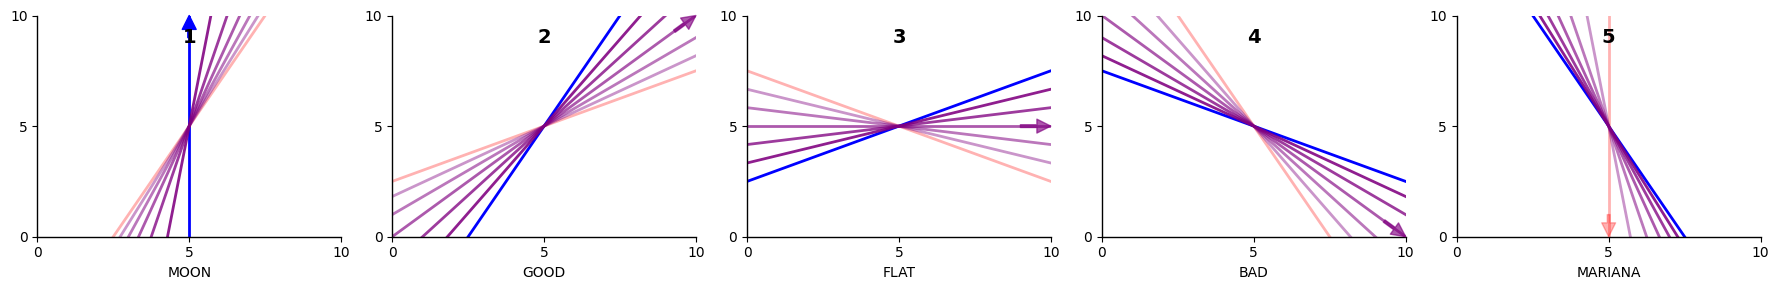

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5  # number of intermediate lines per subplot

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def extend_line_to_grid(x, y, xlim=(0, 10), ylim=(0, 10)):
    """Extend a line (x[0],y[0]) to (x[1],y[1]) until it hits the plot boundary."""
    x0, x1 = x
    y0, y1 = y
    dx = x1 - x0
    dy = y1 - y0

    t_values = []

    if dx != 0:
        t_x0 = (xlim[0] - x0) / dx
        t_x1 = (xlim[1] - x0) / dx
        t_values.extend([t_x0, t_x1])
    if dy != 0:
        t_y0 = (ylim[0] - y0) / dy
        t_y1 = (ylim[1] - y0) / dy
        t_values.extend([t_y0, t_y1])

    t_min = min(t_values)
    t_max = max(t_values)
    new_x = [x0 + dx * t_min, x0 + dx * t_max]
    new_y = [y0 + dy * t_min, y0 + dy * t_max]
    return new_x, new_y

def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0):
    """Plot a line with an arrow at the end following its direction."""
    ax.plot(x_vals, y_vals, color=color, linewidth=2, alpha=alpha)
    dx = x_vals[-1] - x_vals[-2]
    dy = y_vals[-1] - y_vals[-2]
    length = np.sqrt(dx**2 + dy**2)
    tail_dx = -ARROW_TAIL * dx / length if length != 0 else 0
    tail_dy = -ARROW_TAIL * dy / length if length != 0 else 0
    ax.annotate("",
                xy=(x_vals[-1], y_vals[-1]),
                xytext=(x_vals[-1] + tail_dx, y_vals[-1] + tail_dy),
                arrowprops=dict(width=ARROW_WIDTH,
                                headwidth=ARROW_HEAD,
                                headlength=ARROW_HEAD,
                                color=color,
                                alpha=alpha))

def draw_axes(ax):
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([0, 5, 10])
    ax.set_yticks([0, 5, 10])

def interpolate_lines(x_start, y_start, x_end, y_end, alpha_start, alpha_end, num_lines=NUM_RANDOM):
    """Generate intermediate lines between two reference lines with transitioning alpha."""
    lines = []
    alphas = []
    for i in range(num_lines):
        t = (i + 1) / (num_lines + 1)
        x_vals = (1 - t) * np.array(x_start) + t * np.array(x_end)
        y_vals = (1 - t) * np.array(y_start) + t * np.array(y_end)
        alpha = (1 - t) * alpha_start + t * alpha_end
        lines.append((x_vals, y_vals))
        alphas.append(alpha)
    return lines, alphas

# ============================================================
# 3. PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(32, 3))

# Define alphas
alpha_blue = 1.0   # strongest
alpha_red = 0.3    # weakest

for i, label in enumerate([
    "MOON", "GOOD",
    "FLAT", "BAD", "MARIANA"
]):
    ax = plt.subplot(1, 9, i + 1)
    draw_axes(ax)

    if label == "MOON":
        x_blue, y_blue = extend_line_to_grid([5, 5], [0, 10])
        x_red, y_red = extend_line_to_grid([2.5, 7.5], [0, 10])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        lines, alphas = interpolate_lines(x_blue, y_blue, x_red, y_red, alpha_blue, alpha_red)
        for (x_vals, y_vals), alpha in zip(lines, alphas):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=alpha)

    elif label == "GOOD":
        x_blue, y_blue = extend_line_to_grid([2.5, 7.5], [0, 10])
        x_red, y_red = extend_line_to_grid([0, 10], [2.5, 7.5])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        lines, alphas = interpolate_lines(x_blue, y_blue, x_red, y_red, alpha_blue, alpha_red)
        for (x_vals, y_vals), alpha in zip(lines, alphas):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=alpha)

    elif label == "FLAT":
        x_blue, y_blue = extend_line_to_grid([0, 10], [2.5, 7.5])
        x_red, y_red = extend_line_to_grid([0, 10], [7.5, 2.5])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        lines, alphas = interpolate_lines(x_blue, y_blue, x_red, y_red, alpha_blue, alpha_red)
        for (x_vals, y_vals), alpha in zip(lines, alphas):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=alpha)

    elif label == "BAD":
        x_blue, y_blue = extend_line_to_grid([0, 10], [7.5, 2.5])
        x_red, y_red = extend_line_to_grid([2.5, 7.5], [10, 0])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        lines, alphas = interpolate_lines(x_blue, y_blue, x_red, y_red, alpha_blue, alpha_red)
        for (x_vals, y_vals), alpha in zip(lines, alphas):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=alpha)

    elif label == "MARIANA":
        x_blue, y_blue = extend_line_to_grid([2.5, 7.5], [10, 0])
        x_red, y_red = extend_line_to_grid([5, 5], [10, 0])
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        lines, alphas = interpolate_lines(x_blue, y_blue, x_red, y_red, alpha_blue, alpha_red)
        for (x_vals, y_vals), alpha in zip(lines, alphas):
            x_vals, y_vals = extend_line_to_grid(x_vals, y_vals)
            plot_line_with_arrow(ax, x_vals, y_vals, "purple", alpha=alpha)

    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5, 0.9, str(i + 1),
            transform=ax.transAxes,
            ha='center', va='center',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


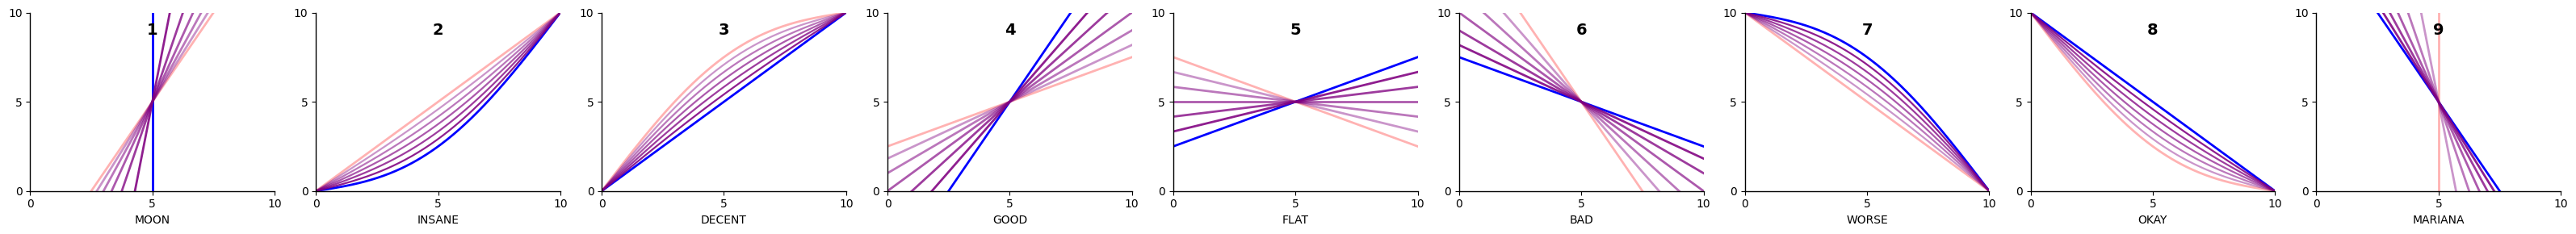

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5
POINTS = 200

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0, linewidth=2):
    """Plot a line with a single arrow at the end following its direction."""
    x_vals = np.asarray(x_vals)
    y_vals = np.asarray(y_vals)
    ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, alpha=alpha)

    # Single end-point arrow
    if len(x_vals) >= 2:
        idx = -1
        if np.isclose(x_vals[-1], x_vals[-2]) and np.isclose(y_vals[-1], y_vals[-2]):
            idx = -2
        dx = x_vals[-1] - x_vals[idx]
        dy = y_vals[-1] - y_vals[idx]
        length = np.hypot(dx, dy)
        tail_dx, tail_dy = (0, 0) if length==0 else (-ARROW_TAIL*dx/length, -ARROW_TAIL*dy/length)
        ax.annotate("",
                    xy=(x_vals[-1], y_vals[-1]),
                    xytext=(x_vals[-1]+tail_dx, y_vals[-1]+tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH, headwidth=ARROW_HEAD, headlength=ARROW_HEAD, color=color, alpha=alpha))

def draw_axes(ax):
    for spine in ["top","right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_xticks([0,5,10])
    ax.set_yticks([0,5,10])

def extend_line_to_grid(x, y, xlim=(0,10), ylim=(0,10)):
    x0,x1 = x
    y0,y1 = y
    dx = x1-x0
    dy = y1-y0
    t_values=[]
    if dx!=0:
        t_values.extend([(xlim[0]-x0)/dx,(xlim[1]-x0)/dx])
    if dy!=0:
        t_values.extend([(ylim[0]-y0)/dy,(ylim[1]-y0)/dy])
    t_min,t_max=min(t_values),max(t_values)
    new_x=[x0+dx*t_min,x0+dx*t_max]
    new_y=[y0+dy*t_min,y0+dy*t_max]
    return new_x,new_y

def interpolate_lines(x_start,y_start,x_end,y_end,alpha_start,alpha_end,num_lines=NUM_RANDOM):
    lines=[]
    alphas=[]
    for i in range(num_lines):
        t=(i+1)/(num_lines+1)
        x_vals=(1-t)*np.array(x_start)+t*np.array(x_end)
        y_vals=(1-t)*np.array(y_start)+t*np.array(y_end)
        lines.append((x_vals,y_vals))
        alphas.append((1-t)*alpha_start+t*alpha_end)
    return lines,alphas

def make_linear_line(x0,y0,x1,y1,pts=POINTS):
    x=np.linspace(x0,x1,pts)
    y=np.linspace(y0,y1,pts)
    return x,y

def bulge_curve(x,y_start,y_end,bulge_strength=1.0,side="right"):
    x=np.asarray(x)
    t=(x-x[0])/(x[-1]-x[0])
    linear=y_start+(y_end-y_start)*t
    amp=bulge_strength*(y_end-y_start if abs(y_end-y_start)>0 else 1.0)*0.25
    sign=1.0 if side=="right" else -1.0
    return linear+sign*amp*np.sin(np.pi*t)

def interpolate_array_lines(xa,ya,xb,yb,n=NUM_RANDOM):
    xa,ya,xb,yb=np.asarray(xa),np.asarray(ya),np.asarray(xb),np.asarray(yb)
    if xa.size==2: xA,yA=make_linear_line(xa[0],ya[0],xa[1],ya[1],POINTS)
    else:
        xA=np.linspace(xa[0],xa[-1],POINTS)
        yA=np.interp(xA,xa,ya)
    if xb.size==2: xB,yB=make_linear_line(xb[0],yb[0],xb[1],yb[1],POINTS)
    else:
        xB=np.linspace(xb[0],xb[-1],POINTS)
        yB=np.interp(xB,xb,yb)
    common_x=np.linspace(0,10,POINTS)
    yA_resampled=np.interp(common_x,xA,yA)
    yB_resampled=np.interp(common_x,xB,yB)
    lines=[]
    for i in range(n):
        t=(i+1)/(n+1)
        y_vals=(1-t)*yA_resampled+t*yB_resampled
        lines.append((common_x,y_vals))
    return lines

# ============================================================
# 3. PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(32,3))

labels_order = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]
alpha_blue=1.0
alpha_red=0.3

for i,label in enumerate(labels_order):
    ax=plt.subplot(1,len(labels_order),i+1)
    draw_axes(ax)
    x_grid=np.linspace(0,10,POINTS)

    # Helper for intermediate violet lines
    def plot_intermediates(xA,yA,xB,yB):
        lines=interpolate_array_lines(xA,yA,xB,yB,n=NUM_RANDOM)
        for idx,(xx,yy) in enumerate(lines):
            t=(idx+1)/(NUM_RANDOM+1)
            alpha=(1-t)*alpha_red+t*alpha_blue  # closer to blue = higher alpha
            plot_line_with_arrow(ax,xx,yy,"purple",alpha=alpha,linewidth=1.6)

    # Bulge/interpolated graphs
    if label=="DECENT":
        x_red=x_grid
        y_red=x_grid
        plot_line_with_arrow(ax,x_red,y_red,"blue",alpha=alpha_blue)
        y_blue=bulge_curve(x_grid,0,10,bulge_strength=1.0,side="right")
        plot_line_with_arrow(ax,x_grid,y_blue,"red",alpha=alpha_red)
        plot_intermediates(x_grid,y_blue,x_red,y_red)
    elif label=="INSANE":
        x_blue=x_grid
        y_blue=x_grid
        plot_line_with_arrow(ax,x_blue,y_blue,"red",alpha=alpha_red)
        y_red=bulge_curve(x_grid,0,10,bulge_strength=1.0,side="left")
        plot_line_with_arrow(ax,x_grid,y_red,"blue",alpha=alpha_blue)
        plot_intermediates(x_blue,y_blue,x_grid,y_red)
    elif label=="OKAY":
        x_red=x_grid
        y_red=10-x_grid
        plot_line_with_arrow(ax,x_red,y_red,"blue",alpha=alpha_blue)
        y_blue=bulge_curve(x_grid,10,0,bulge_strength=1.0,side="right")
        plot_line_with_arrow(ax,x_grid,y_blue,"red",alpha=alpha_red)
        plot_intermediates(x_grid,y_blue,x_red,y_red)
    elif label=="WORSE":
        x_blue=x_grid
        y_blue=10-x_grid
        plot_line_with_arrow(ax,x_blue,y_blue,"red",alpha=alpha_red)
        y_red=bulge_curve(x_grid,10,0,bulge_strength=1.0,side="left")
        plot_line_with_arrow(ax,x_grid,y_red,"blue",alpha=alpha_blue)
        plot_intermediates(x_blue,y_blue,x_grid,y_red)

    # Linear reference graphs
    if label=="MOON":
        x_blue,y_blue=extend_line_to_grid([5,5],[0,10])
        x_red,y_red=extend_line_to_grid([2.5,7.5],[0,10])
    elif label=="GOOD":
        x_blue,y_blue=extend_line_to_grid([2.5,7.5],[0,10])
        x_red,y_red=extend_line_to_grid([0,10],[2.5,7.5])
    elif label=="FLAT":
        x_blue,y_blue=extend_line_to_grid([0,10],[2.5,7.5])
        x_red,y_red=extend_line_to_grid([0,10],[7.5,2.5])
    elif label=="BAD":
        x_blue,y_blue=extend_line_to_grid([0,10],[7.5,2.5])
        x_red,y_red=extend_line_to_grid([2.5,7.5],[10,0])
    elif label=="MARIANA":
        x_blue,y_blue=extend_line_to_grid([2.5,7.5],[10,0])
        x_red,y_red=extend_line_to_grid([5,5],[10,0])

    if label in ["MOON","GOOD","FLAT","BAD","MARIANA"]:
        plot_line_with_arrow(ax,x_blue,y_blue,"blue",alpha=alpha_blue)
        plot_line_with_arrow(ax,x_red,y_red,"red",alpha=alpha_red)
        lines,alphas=interpolate_lines(x_blue,y_blue,x_red,y_red,alpha_blue,alpha_red)
        for (x_vals,y_vals),alpha in zip(lines,alphas):
            x_vals,y_vals=extend_line_to_grid(x_vals,y_vals)
            plot_line_with_arrow(ax,x_vals,y_vals,"purple",alpha=alpha)

    ax.set_xlabel(label,fontsize=10)
    ax.text(0.5,0.9,str(i+1),transform=ax.transAxes,ha='center',va='center',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()


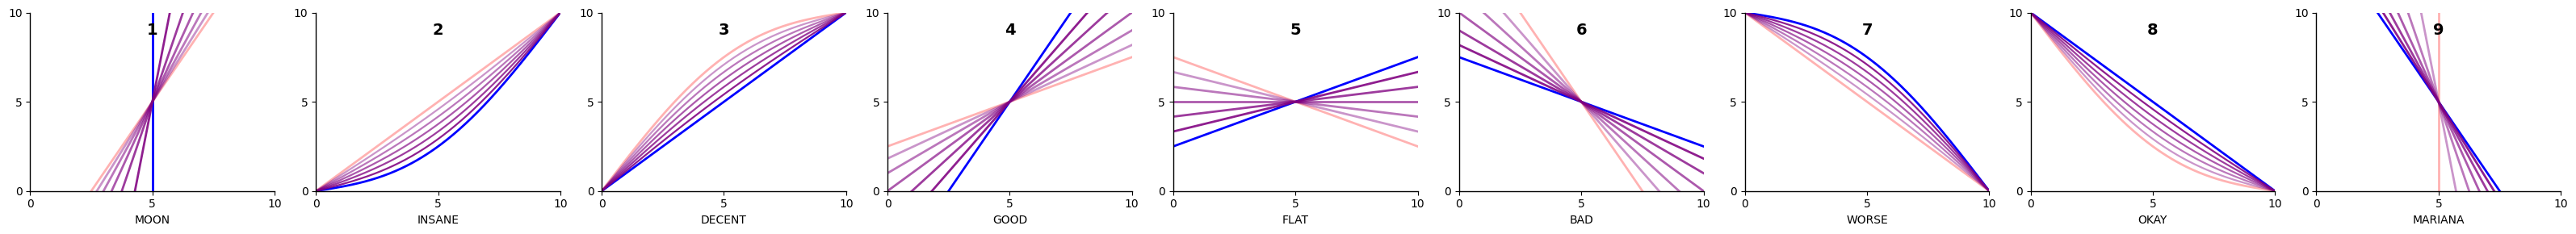

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5
POINTS = 200

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0, linewidth=2):
    """Plot a line with a single arrow at the end following its direction."""
    x_vals = np.asarray(x_vals)
    y_vals = np.asarray(y_vals)
    ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, alpha=alpha)

    if len(x_vals) >= 2:
        idx = -1
        if np.isclose(x_vals[-1], x_vals[-2]) and np.isclose(y_vals[-1], y_vals[-2]):
            idx = -2
        dx = x_vals[-1] - x_vals[idx]
        dy = y_vals[-1] - y_vals[idx]
        length = np.hypot(dx, dy)
        tail_dx, tail_dy = (0, 0) if length == 0 else (-ARROW_TAIL*dx/length, -ARROW_TAIL*dy/length)
        ax.annotate("",
                    xy=(x_vals[-1], y_vals[-1]),
                    xytext=(x_vals[-1]+tail_dx, y_vals[-1]+tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH, headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD, color=color, alpha=alpha))

def draw_axes(ax):
    for spine in ["top","right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_xticks([0,5,10])
    ax.set_yticks([0,5,10])

def extend_line_to_grid(x, y, xlim=(0,10), ylim=(0,10)):
    x0,x1 = x
    y0,y1 = y
    dx = x1-x0
    dy = y1-y0
    t_values=[]
    if dx!=0:
        t_values.extend([(xlim[0]-x0)/dx,(xlim[1]-x0)/dx])
    if dy!=0:
        t_values.extend([(ylim[0]-y0)/dy,(ylim[1]-y0)/dy])
    t_min,t_max=min(t_values),max(t_values)
    new_x=[x0+dx*t_min,x0+dx*t_max]
    new_y=[y0+dy*t_min,y0+dy*t_max]
    return new_x,new_y

def interpolate_lines(x_start,y_start,x_end,y_end,alpha_start,alpha_end,num_lines=NUM_RANDOM):
    lines=[]
    alphas=[]
    for i in range(num_lines):
        t=(i+1)/(num_lines+1)
        x_vals=(1-t)*np.array(x_start)+t*np.array(x_end)
        y_vals=(1-t)*np.array(y_start)+t*np.array(y_end)
        lines.append((x_vals,y_vals))
        alphas.append((1-t)*alpha_start+t*alpha_end)
    return lines,alphas

def make_linear_line(x0,y0,x1,y1,pts=POINTS):
    x=np.linspace(x0,x1,pts)
    y=np.linspace(y0,y1,pts)
    return x,y

def bulge_curve(x,y_start,y_end,bulge_strength=1.0,side="right"):
    x=np.asarray(x)
    t=(x-x[0])/(x[-1]-x[0])
    linear=y_start+(y_end-y_start)*t
    amp=bulge_strength*(y_end-y_start if abs(y_end-y_start)>0 else 1.0)*0.25
    sign=1.0 if side=="right" else -1.0
    return linear+sign*amp*np.sin(np.pi*t)

def interpolate_array_lines(xa,ya,xb,yb,n=NUM_RANDOM):
    xa,ya,xb,yb=np.asarray(xa),np.asarray(ya),np.asarray(xb),np.asarray(yb)
    if xa.size==2: xA,yA=make_linear_line(xa[0],ya[0],xa[1],ya[1],POINTS)
    else:
        xA=np.linspace(xa[0],xa[-1],POINTS)
        yA=np.interp(xA,xa,ya)
    if xb.size==2: xB,yB=make_linear_line(xb[0],yb[0],xb[1],yb[1],POINTS)
    else:
        xB=np.linspace(xb[0],xb[-1],POINTS)
        yB=np.interp(xB,xb,yb)
    common_x=np.linspace(0,10,POINTS)
    yA_resampled=np.interp(common_x,xA,yA)
    yB_resampled=np.interp(common_x,xB,yB)
    lines=[]
    for i in range(n):
        t=(i+1)/(n+1)
        y_vals=(1-t)*yA_resampled+t*yB_resampled
        lines.append((common_x,y_vals))
    return lines

# ============================================================
# 3. PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(32,3))

labels_order = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]
alpha_blue=1.0
alpha_red=0.3

for i,label in enumerate(labels_order):
    ax=plt.subplot(1,len(labels_order),i+1)
    draw_axes(ax)
    x_grid=np.linspace(0,10,POINTS)

    # Helper for intermediate violet lines
    def plot_intermediates(xA,yA,xB,yB):
        lines=interpolate_array_lines(xA,yA,xB,yB,n=NUM_RANDOM)
        for idx,(xx,yy) in enumerate(lines):
            t=(idx+1)/(NUM_RANDOM+1)
            alpha=(1-t)*alpha_red+t*alpha_blue
            plot_line_with_arrow(ax,xx,yy,"purple",alpha=alpha,linewidth=1.6)

    # ========================================================
    # LOGIC FOR EACH LABEL
    # ========================================================
    if label=="DECENT":
        x_red=x_grid; y_red=x_grid
        plot_line_with_arrow(ax,x_red,y_red,"blue",alpha=alpha_blue)
        y_blue=bulge_curve(x_grid,0,10,bulge_strength=1.0,side="right")
        plot_line_with_arrow(ax,x_grid,y_blue,"red",alpha=alpha_red)
        plot_intermediates(x_grid,y_blue,x_red,y_red)

    elif label=="INSANE":
        x_blue=x_grid; y_blue=x_grid
        plot_line_with_arrow(ax,x_blue,y_blue,"red",alpha=alpha_red)
        y_red=bulge_curve(x_grid,0,10,bulge_strength=1.0,side="left")
        plot_line_with_arrow(ax,x_grid,y_red,"blue",alpha=alpha_blue)
        plot_intermediates(x_blue,y_blue,x_grid,y_red)

    elif label=="OKAY":
        x_red=x_grid; y_red=10-x_grid
        plot_line_with_arrow(ax,x_red,y_red,"blue",alpha=alpha_blue)
        y_blue=bulge_curve(x_grid,10,0,bulge_strength=1.0,side="right")
        plot_line_with_arrow(ax,x_grid,y_blue,"red",alpha=alpha_red)
        plot_intermediates(x_grid,y_blue,x_red,y_red)

    elif label=="WORSE":
        x_blue=x_grid; y_blue=10-x_grid
        plot_line_with_arrow(ax,x_blue,y_blue,"red",alpha=alpha_red)
        y_red=bulge_curve(x_grid,10,0,bulge_strength=1.0,side="left")
        plot_line_with_arrow(ax,x_grid,y_red,"blue",alpha=alpha_blue)
        plot_intermediates(x_blue,y_blue,x_grid,y_red)

    elif label=="MOON":
        x_blue,y_blue=extend_line_to_grid([5,5],[0,10])
        x_red,y_red=extend_line_to_grid([2.5,7.5],[0,10])

    elif label=="GOOD":
        x_blue,y_blue=extend_line_to_grid([2.5,7.5],[0,10])
        x_red,y_red=extend_line_to_grid([0,10],[2.5,7.5])

    elif label=="FLAT":
        x_blue,y_blue=extend_line_to_grid([0,10],[2.5,7.5])
        x_red,y_red=extend_line_to_grid([0,10],[7.5,2.5])

    elif label=="BAD":
        x_blue,y_blue=extend_line_to_grid([0,10],[7.5,2.5])
        x_red,y_red=extend_line_to_grid([2.5,7.5],[10,0])

    elif label=="MARIANA":
        x_blue,y_blue=extend_line_to_grid([2.5,7.5],[10,0])
        x_red,y_red=extend_line_to_grid([5,5],[10,0])

    # ========================================================
    # DRAW LINES + INTERPOLATIONS FOR LINEAR TYPES
    # ========================================================
    if label in ["MOON","GOOD","FLAT","BAD","MARIANA"]:
        plot_line_with_arrow(ax,x_blue,y_blue,"blue",alpha=alpha_blue)
        plot_line_with_arrow(ax,x_red,y_red,"red",alpha=alpha_red)
        lines,alphas=interpolate_lines(x_blue,y_blue,x_red,y_red,alpha_blue,alpha_red)
        for (x_vals,y_vals),alpha in zip(lines,alphas):
            x_vals,y_vals=extend_line_to_grid(x_vals,y_vals)
            plot_line_with_arrow(ax,x_vals,y_vals,"purple",alpha=alpha)

    # ========================================================
    # LABELING
    # ========================================================
    ax.set_xlabel(label,fontsize=10)
    ax.text(0.5,0.9,str(i+1),transform=ax.transAxes,
            ha='center',va='center',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

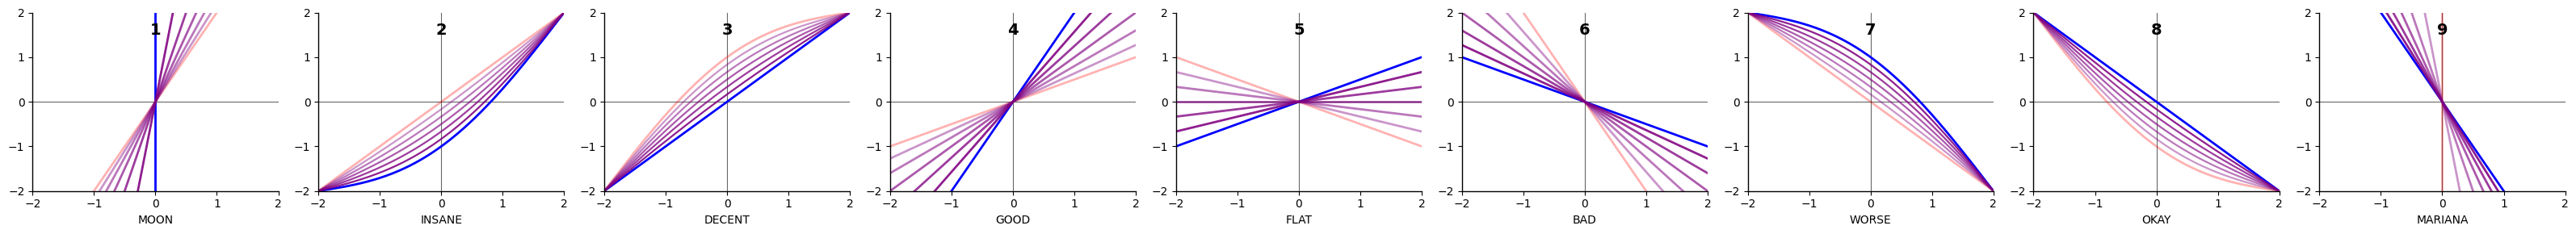

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5
POINTS = 200

# ============================================================
# 2. GRID SETTINGS (AUTO-ADJUSTABLE DEVIATIONS)
# ============================================================
X_MIN, X_MAX = -2, 2   # deviation range for x-axis
Y_MIN, Y_MAX = -2, 2   # deviation range for y-axis
X_TICKS = [-2, -1, 0, 1, 2]
Y_TICKS = [-2, -1, 0, 1, 2]

# ============================================================
# 3. HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0, linewidth=2):
    x_vals = np.asarray(x_vals)
    y_vals = np.asarray(y_vals)
    ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, alpha=alpha)

    if len(x_vals) >= 2:
        idx = -1
        if np.isclose(x_vals[-1], x_vals[-2]) and np.isclose(y_vals[-1], y_vals[-2]):
            idx = -2
        dx = x_vals[-1] - x_vals[idx]
        dy = y_vals[-1] - y_vals[idx]
        length = np.hypot(dx, dy)
        tail_dx, tail_dy = (0, 0) if length == 0 else (-ARROW_TAIL*dx/length, -ARROW_TAIL*dy/length)
        ax.annotate("",
                    xy=(x_vals[-1], y_vals[-1]),
                    xytext=(x_vals[-1]+tail_dx, y_vals[-1]+tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH, headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD, color=color, alpha=alpha))

def draw_axes(ax):
    for spine in ["top","right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)
    ax.set_xticks(X_TICKS)
    ax.set_yticks(Y_TICKS)
    ax.axhline(0, color="black", linewidth=0.8, alpha=0.6)
    ax.axvline(0, color="black", linewidth=0.8, alpha=0.6)

def extend_line_to_grid(x, y, xlim=(X_MIN,X_MAX), ylim=(Y_MIN,Y_MAX)):
    x0,x1 = x
    y0,y1 = y
    dx = x1-x0
    dy = y1-y0
    t_values=[]
    if dx!=0:
        t_values.extend([(xlim[0]-x0)/dx,(xlim[1]-x0)/dx])
    if dy!=0:
        t_values.extend([(ylim[0]-y0)/dy,(ylim[1]-y0)/dy])
    t_min,t_max=min(t_values),max(t_values)
    new_x=[x0+dx*t_min,x0+dx*t_max]
    new_y=[y0+dy*t_min,y0+dy*t_max]
    return new_x,new_y

def interpolate_lines(x_start,y_start,x_end,y_end,alpha_start,alpha_end,num_lines=NUM_RANDOM):
    lines=[]
    alphas=[]
    for i in range(num_lines):
        t=(i+1)/(num_lines+1)
        x_vals=(1-t)*np.array(x_start)+t*np.array(x_end)
        y_vals=(1-t)*np.array(y_start)+t*np.array(y_end)
        lines.append((x_vals,y_vals))
        alphas.append((1-t)*alpha_start+t*alpha_end)
    return lines,alphas

def make_linear_line(x0,y0,x1,y1,pts=POINTS):
    x=np.linspace(x0,x1,pts)
    y=np.linspace(y0,y1,pts)
    return x,y

def bulge_curve(x,y_start,y_end,bulge_strength=1.0,side="right"):
    x=np.asarray(x)
    t=(x-x[0])/(x[-1]-x[0])
    linear=y_start+(y_end-y_start)*t
    amp=bulge_strength*(y_end-y_start if abs(y_end-y_start)>0 else 1.0)*0.25
    sign=1.0 if side=="right" else -1.0
    return linear+sign*amp*np.sin(np.pi*t)

def interpolate_array_lines(xa,ya,xb,yb,n=NUM_RANDOM):
    xa,ya,xb,yb=np.asarray(xa),np.asarray(ya),np.asarray(xb),np.asarray(yb)
    if xa.size==2: xA,yA=make_linear_line(xa[0],ya[0],xa[1],ya[1],POINTS)
    else:
        xA=np.linspace(xa[0],xa[-1],POINTS)
        yA=np.interp(xA,xa,ya)
    if xb.size==2: xB,yB=make_linear_line(xb[0],yb[0],xb[1],yb[1],POINTS)
    else:
        xB=np.linspace(xb[0],xb[-1],POINTS)
        yB=np.interp(xB,xb,yb)
    common_x=np.linspace(X_MIN,X_MAX,POINTS)
    yA_resampled=np.interp(common_x,xA,yA)
    yB_resampled=np.interp(common_x,xB,yB)
    lines=[]
    for i in range(n):
        t=(i+1)/(n+1)
        y_vals=(1-t)*yA_resampled+t*yB_resampled
        lines.append((common_x,y_vals))
    return lines

# ============================================================
# 4. PLOT SUBPLOTS
# ============================================================
plt.figure(figsize=(32,3))

labels_order = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]
alpha_blue=1.0
alpha_red=0.3

for i,label in enumerate(labels_order):
    ax=plt.subplot(1,len(labels_order),i+1)
    draw_axes(ax)
    x_grid=np.linspace(X_MIN,X_MAX,POINTS)

    def plot_intermediates(xA,yA,xB,yB):
        lines=interpolate_array_lines(xA,yA,xB,yB,n=NUM_RANDOM)
        for idx,(xx,yy) in enumerate(lines):
            t=(idx+1)/(NUM_RANDOM+1)
            alpha=(1-t)*alpha_red+t*alpha_blue
            plot_line_with_arrow(ax,xx,yy,"purple",alpha=alpha,linewidth=1.6)

    # ========================================================
    # LOGIC FOR EACH LABEL
    # ========================================================
    if label=="DECENT":
        x_red=x_grid; y_red=x_grid
        plot_line_with_arrow(ax,x_red,y_red,"blue",alpha=alpha_blue)
        y_blue=bulge_curve(x_grid,Y_MIN,Y_MAX,bulge_strength=1.0,side="right")
        plot_line_with_arrow(ax,x_grid,y_blue,"red",alpha=alpha_red)
        plot_intermediates(x_grid,y_blue,x_red,y_red)

    elif label=="INSANE":
        x_blue=x_grid; y_blue=x_grid
        plot_line_with_arrow(ax,x_blue,y_blue,"red",alpha=alpha_red)
        y_red=bulge_curve(x_grid,Y_MIN,Y_MAX,bulge_strength=1.0,side="left")
        plot_line_with_arrow(ax,x_grid,y_red,"blue",alpha=alpha_blue)
        plot_intermediates(x_blue,y_blue,x_grid,y_red)

    elif label=="OKAY":
        # Straight anti-diagonal (blue), from (X_MIN, Y_MAX) to (X_MAX, Y_MIN)
        # Maps the original y = 10 - x pattern into deviation space
        x_red = x_grid
        y_red = Y_MAX - (x_grid - X_MIN) * (Y_MAX - Y_MIN) / (X_MAX - X_MIN)
        plot_line_with_arrow(ax, x_red, y_red, "blue", alpha=alpha_blue)

        # Bulged curve (red), from Y_MAX to Y_MIN, bulge to the "right"
        y_blue = bulge_curve(x_grid, Y_MAX, Y_MIN, bulge_strength=1.0, side="right")
        plot_line_with_arrow(ax, x_grid, y_blue, "red", alpha=alpha_red)

        plot_intermediates(x_grid, y_blue, x_red, y_red)

    elif label=="WORSE":
        # Straight anti-diagonal (red), from (X_MIN, Y_MAX) to (X_MAX, Y_MIN)
        x_blue = x_grid
        y_blue = Y_MAX - (x_grid - X_MIN) * (Y_MAX - Y_MIN) / (X_MAX - X_MIN)
        plot_line_with_arrow(ax, x_blue, y_blue, "red", alpha=alpha_red)

        # Bulged curve (blue), from Y_MAX to Y_MIN, bulge to the "left"
        y_red = bulge_curve(x_grid, Y_MAX, Y_MIN, bulge_strength=1.0, side="left")
        plot_line_with_arrow(ax, x_grid, y_red, "blue", alpha=alpha_blue)

        plot_intermediates(x_blue, y_blue, x_grid, y_red)

    elif label=="MOON":
        x_blue,y_blue=extend_line_to_grid([0,0],[Y_MIN,Y_MAX])
        x_red,y_red=extend_line_to_grid([-1,1],[Y_MIN,Y_MAX])

    elif label=="GOOD":
        x_blue,y_blue=extend_line_to_grid([-1,1],[Y_MIN,Y_MAX])
        x_red,y_red=extend_line_to_grid([X_MIN,X_MAX],[-1,1])

    elif label=="FLAT":
        x_blue,y_blue=extend_line_to_grid([X_MIN,X_MAX],[-1,1])
        x_red,y_red=extend_line_to_grid([X_MIN,X_MAX],[1,-1])

    elif label=="BAD":
        x_blue,y_blue=extend_line_to_grid([X_MIN,X_MAX],[1,-1])
        x_red,y_red=extend_line_to_grid([-1,1],[Y_MAX,Y_MIN])

    elif label=="MARIANA":
        x_blue,y_blue=extend_line_to_grid([-1,1],[Y_MAX,Y_MIN])
        x_red,y_red=extend_line_to_grid([0,0],[Y_MAX,Y_MIN])

    # ========================================================
    # DRAW LINES + INTERPOLATIONS FOR LINEAR TYPES
    # ========================================================
    if label in ["MOON","GOOD","FLAT","BAD","MARIANA"]:
        plot_line_with_arrow(ax,x_blue,y_blue,"blue",alpha=alpha_blue)
        plot_line_with_arrow(ax,x_red,y_red,"red",alpha=alpha_red)
        lines,alphas=interpolate_lines(x_blue,y_blue,x_red,y_red,alpha_blue,alpha_red)
        for (x_vals,y_vals),alpha in zip(lines,alphas):
            x_vals,y_vals=extend_line_to_grid(x_vals,y_vals)
            plot_line_with_arrow(ax,x_vals,y_vals,"purple",alpha=alpha)

    # ========================================================
    # LABELING
    # ========================================================
    ax.set_xlabel(label,fontsize=10)
    ax.text(0.5,0.9,str(i+1),transform=ax.transAxes,
            ha='center',va='center',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()

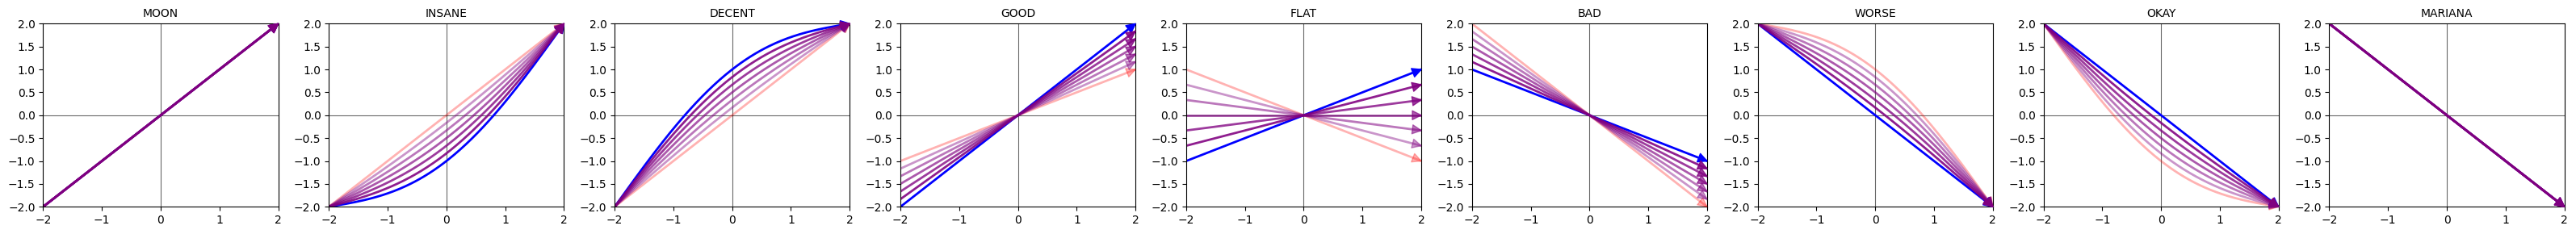

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 0.05
ARROW_HEAD = 8
ARROW_WIDTH = 1.5
NUM_RANDOM = 5
POINTS = 200
X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = -2, 2
alpha_blue = 1.0
alpha_red = 0.3

x_grid = np.linspace(X_MIN, X_MAX, POINTS)

# ============================================================
# 2. HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x_vals, y_vals, color, alpha=1.0, linewidth=2):
    ax.plot(x_vals, y_vals, color=color, linewidth=linewidth, alpha=alpha)
    if len(x_vals) >= 2:
        dx = x_vals[-1] - x_vals[-2]
        dy = y_vals[-1] - y_vals[-2]
        length = np.hypot(dx, dy)
        if length > 0:
            tail_dx, tail_dy = -ARROW_TAIL*dx/length, -ARROW_TAIL*dy/length
            ax.annotate("", xy=(x_vals[-1], y_vals[-1]),
                        xytext=(x_vals[-1]+tail_dx, y_vals[-1]+tail_dy),
                        arrowprops=dict(width=ARROW_WIDTH, headwidth=ARROW_HEAD,
                                        headlength=ARROW_HEAD, color=color, alpha=alpha))

def bulge_curve(x, y_start, y_end, bulge_strength=1.0, side="right"):
    t = (x - x[0]) / (x[-1] - x[0])
    linear = y_start + (y_end - y_start) * t
    amp = bulge_strength * (y_end - y_start if abs(y_end - y_start) > 0 else 1.0) * 0.25
    sign = 1.0 if side == "right" else -1.0
    return linear + sign * amp * np.sin(np.pi * t)

def interpolate_lines(x_start, y_start, x_end, y_end, alpha_start=alpha_red, alpha_end=alpha_blue, num_lines=NUM_RANDOM):
    lines = []
    alphas = []
    for i in range(num_lines):
        t = (i + 1) / (num_lines + 1)
        y_vals = (1 - t) * np.array(y_start) + t * np.array(y_end)
        lines.append(y_vals)
        alpha = (1 - t) * alpha_end + t * alpha_start
        alphas.append(alpha)
    return lines, alphas

# ============================================================
# 3. PLOT ALL GRAPHS
# ============================================================
labels_order = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]

plt.figure(figsize=(32, 3))

for i, label in enumerate(labels_order):
    ax = plt.subplot(1, len(labels_order), i+1)
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)
    ax.axhline(0, color="black", alpha=0.6, linewidth=0.8)
    ax.axvline(0, color="black", alpha=0.6, linewidth=0.8)
    
    # ----------------------------
    # Define blue and red lines
    # ----------------------------
    if label == "DECENT":
        y_red = x_grid
        y_blue = bulge_curve(x_grid, Y_MIN, Y_MAX, side="right")
    elif label == "INSANE":
        y_red = x_grid
        y_blue = bulge_curve(x_grid, Y_MIN, Y_MAX, side="left")
    elif label == "OKAY":
        y_red = bulge_curve(x_grid, Y_MAX, Y_MIN, side="right")
        y_blue = Y_MAX - (x_grid - X_MIN)*(Y_MAX-Y_MIN)/(X_MAX-X_MIN)
    elif label == "WORSE":
        y_red = bulge_curve(x_grid, Y_MAX, Y_MIN, side="left")
        y_blue = Y_MAX - (x_grid - X_MIN)*(Y_MAX-Y_MIN)/(X_MAX-X_MIN)
    elif label == "MOON":
        y_blue = np.linspace(Y_MIN, Y_MAX, POINTS)
        y_red = np.linspace(Y_MIN, Y_MAX, POINTS)
    elif label == "GOOD":
        y_blue = np.linspace(Y_MIN, Y_MAX, POINTS)
        y_red = np.linspace(-1, 1, POINTS)
    elif label == "FLAT":
        y_blue = np.linspace(-1, 1, POINTS)
        y_red = np.linspace(1, -1, POINTS)
    elif label == "BAD":
        y_blue = np.linspace(1, -1, POINTS)
        y_red = np.linspace(Y_MAX, Y_MIN, POINTS)
    elif label == "MARIANA":
        y_blue = np.linspace(Y_MAX, Y_MIN, POINTS)
        y_red = np.linspace(Y_MAX, Y_MIN, POINTS)
    
    # ----------------------------
    # Draw blue line
    # ----------------------------
    plot_line_with_arrow(ax, x_grid, y_blue, "blue", alpha=alpha_blue)
    
    # ----------------------------
    # Draw red line
    # ----------------------------
    plot_line_with_arrow(ax, x_grid, y_red, "red", alpha=alpha_red)
    
    # ----------------------------
    # Draw violet interpolated lines
    # ----------------------------
    violet_lines, violet_alphas = interpolate_lines(x_grid, y_blue, x_grid, y_red)
    for y_vals, alpha in zip(violet_lines, violet_alphas):
        plot_line_with_arrow(ax, x_grid, y_vals, "purple", alpha=alpha)

    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()


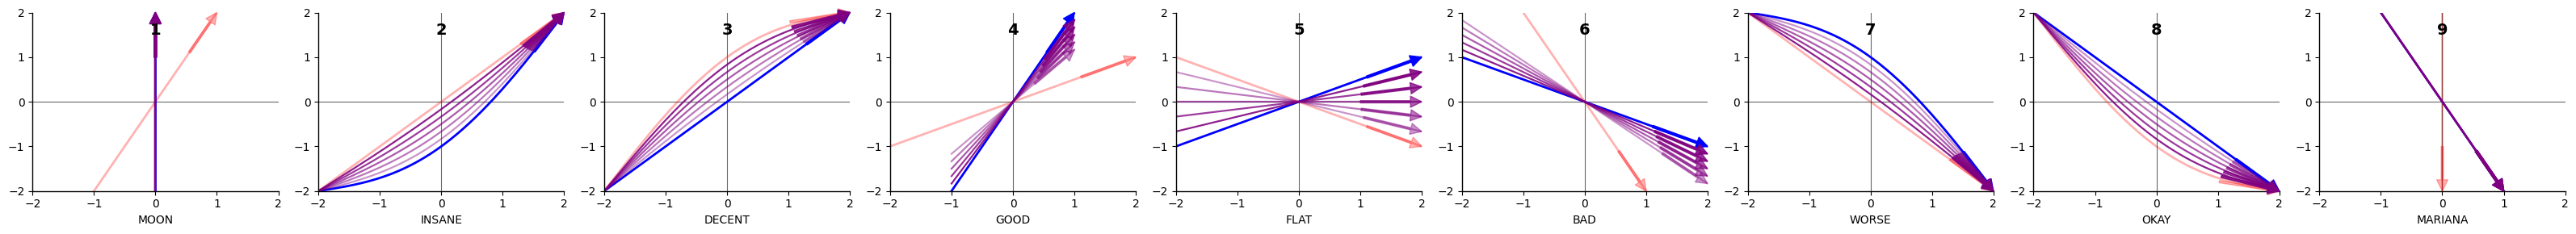

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# CONSTANTS
# ============================================================
ARROW_TAIL = 1
ARROW_HEAD = 10
ARROW_WIDTH = 2
NUM_RANDOM = 5
POINTS = 200

# ============================================================
# GRID SETTINGS
# ============================================================
X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = -2, 2
X_TICKS = [-2, -1, 0, 1, 2]
Y_TICKS = [-2, -1, 0, 1, 2]

# ============================================================
# HELPER FUNCTIONS
# ============================================================
def plot_line_with_arrow(ax, x, y, color, alpha=1.0, linewidth=2):
    ax.plot(x, y, color=color, linewidth=linewidth, alpha=alpha)
    if len(x) >= 2:
        dx, dy = x[-1]-x[-2], y[-1]-y[-2]
        length = np.hypot(dx, dy)
        if length > 0:
            tail_dx, tail_dy = -ARROW_TAIL*dx/length, -ARROW_TAIL*dy/length
            ax.annotate("", xy=(x[-1], y[-1]), xytext=(x[-1]+tail_dx, y[-1]+tail_dy),
                        arrowprops=dict(width=ARROW_WIDTH, headwidth=ARROW_HEAD,
                                        headlength=ARROW_HEAD, color=color, alpha=alpha))

def draw_axes(ax):
    for spine in ["top","right"]: ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(X_MIN,X_MAX)
    ax.set_ylim(Y_MIN,Y_MAX)
    ax.set_xticks(X_TICKS)
    ax.set_yticks(Y_TICKS)
    ax.axhline(0,color="black",linewidth=0.8,alpha=0.6)
    ax.axvline(0,color="black",linewidth=0.8,alpha=0.6)

def bulge_curve(x, y_start, y_end, bulge_strength=1.0, side="right"):
    x = np.asarray(x)
    t = (x - x[0]) / (x[-1] - x[0])
    linear = y_start + (y_end - y_start) * t
    amp = bulge_strength * (y_end - y_start if abs(y_end - y_start)>0 else 1.0) * 0.25
    sign = 1.0 if side=="right" else -1.0
    return linear + sign * amp * np.sin(np.pi * t)

def interpolate_lines(xA, yA, xB, yB, alpha_start, alpha_end, n=NUM_RANDOM):
    lines, alphas = [], []
    for i in range(n):
        t = (i+1)/(n+1)
        y_vals = (1-t)*yA + t*yB
        lines.append((xA, y_vals))
        alphas.append((1-t)*alpha_start + t*alpha_end)
    return lines, alphas

# ============================================================
# PLOT ALL GRAPHS
# ============================================================
labels_order = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]
alpha_blue = 1.0
alpha_red = 0.3
x_grid = np.linspace(X_MIN, X_MAX, POINTS)

plt.figure(figsize=(32,3))

for i,label in enumerate(labels_order):
    ax = plt.subplot(1,len(labels_order),i+1)
    draw_axes(ax)
    
    def plot_intermediate_lines(xA, yA, xB, yB):
        lines, alphas = interpolate_lines(xA, yA, xB, yB, alpha_blue, alpha_red)
        for (xx, yy), alpha in zip(lines, alphas):
            plot_line_with_arrow(ax, xx, yy, "purple", alpha=alpha, linewidth=1.6)

    # ==========================
    # LOGIC PER GRAPH
    # ==========================
    if label=="DECENT":
        x_red = x_grid
        y_red = x_grid
        plot_line_with_arrow(ax, x_red, y_red, "blue", alpha=alpha_blue)
        y_blue = bulge_curve(x_grid, Y_MIN, Y_MAX, bulge_strength=1.0, side="right")
        plot_line_with_arrow(ax, x_grid, y_blue, "red", alpha=alpha_red)
        plot_intermediate_lines(x_grid, y_blue, x_red, y_red)

    elif label=="INSANE":
        x_blue = x_grid
        y_blue = x_grid
        plot_line_with_arrow(ax, x_blue, y_blue, "red", alpha=alpha_red)
        y_red = bulge_curve(x_grid, Y_MIN, Y_MAX, bulge_strength=1.0, side="left")
        plot_line_with_arrow(ax, x_grid, y_red, "blue", alpha=alpha_blue)
        plot_intermediate_lines(x_blue, y_blue, x_grid, y_red)

    elif label=="OKAY":
        x_red = x_grid
        y_red = Y_MAX - (x_grid - X_MIN)*(Y_MAX - Y_MIN)/(X_MAX - X_MIN)
        plot_line_with_arrow(ax, x_red, y_red, "blue", alpha=alpha_blue)
        y_blue = bulge_curve(x_grid, Y_MAX, Y_MIN, bulge_strength=1.0, side="right")
        plot_line_with_arrow(ax, x_grid, y_blue, "red", alpha=alpha_red)
        plot_intermediate_lines(x_grid, y_blue, x_red, y_red)

    elif label=="WORSE":
        x_blue = x_grid
        y_blue = Y_MAX - (x_grid - X_MIN)*(Y_MAX - Y_MIN)/(X_MAX - X_MIN)
        plot_line_with_arrow(ax, x_blue, y_blue, "red", alpha=alpha_red)
        y_red = bulge_curve(x_grid, Y_MAX, Y_MIN, bulge_strength=1.0, side="left")
        plot_line_with_arrow(ax, x_grid, y_red, "blue", alpha=alpha_blue)
        plot_intermediate_lines(x_blue, y_blue, x_grid, y_red)

    elif label=="MOON":
        x_blue = np.zeros(POINTS)
        y_blue = np.linspace(Y_MIN, Y_MAX, POINTS)
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        x_red = np.linspace(-1, 1, POINTS)
        y_red = np.linspace(Y_MIN, Y_MAX, POINTS)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        plot_intermediate_lines(x_blue, y_blue, x_red, y_red)

    elif label=="GOOD":
        x_blue = np.linspace(-1, 1, POINTS)
        y_blue = np.linspace(Y_MIN, Y_MAX, POINTS)
        x_red = x_grid
        y_red = np.linspace(-1,1,POINTS)
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        plot_intermediate_lines(x_blue, y_blue, x_red, y_red)

    elif label=="FLAT":
        x_blue = x_grid
        y_blue = np.linspace(-1,1,POINTS)
        x_red = x_grid
        y_red = np.linspace(1,-1,POINTS)
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        plot_intermediate_lines(x_blue, y_blue, x_red, y_red)

    elif label=="BAD":
        x_blue = x_grid
        y_blue = np.linspace(1,-1,POINTS)
        x_red = np.linspace(-1,1,POINTS)
        y_red = np.linspace(Y_MAX, Y_MIN, POINTS)
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        plot_intermediate_lines(x_blue, y_blue, x_red, y_red)

    elif label=="MARIANA":
        x_blue = np.linspace(-1,1,POINTS)
        y_blue = np.linspace(Y_MAX, Y_MIN, POINTS)
        plot_line_with_arrow(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
        x_red = np.zeros(POINTS)
        y_red = np.linspace(Y_MAX, Y_MIN, POINTS)
        plot_line_with_arrow(ax, x_red, y_red, "red", alpha=alpha_red)
        plot_intermediate_lines(x_blue, y_blue, x_red, y_red)

    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5,0.9,str(i+1),transform=ax.transAxes,
            ha='center',va='center',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()


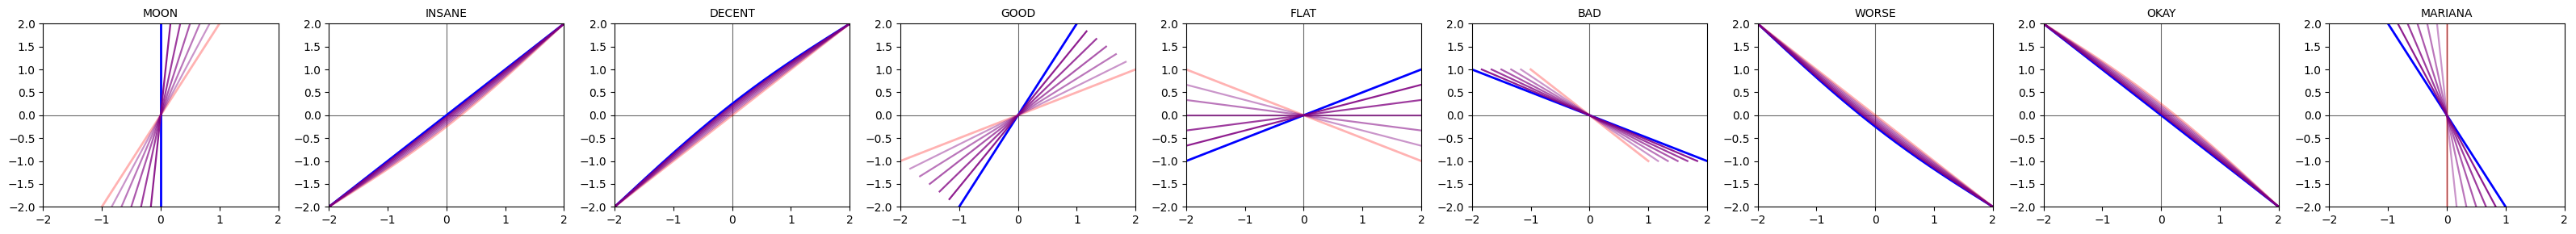

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# 1. CONSTANTS
# ==============================
POINTS = 200
NUM_VIOLET = 5
X_MIN, X_MAX = -2, 2
Y_MIN, Y_MAX = -2, 2
alpha_blue = 1.0
alpha_red = 0.3

# ==============================
# 2. HELPER FUNCTIONS
# ==============================
def make_linear_line(x0, y0, x1, y1, pts=POINTS):
    x = np.linspace(x0, x1, pts)
    y = np.linspace(y0, y1, pts)
    return x, y

def bulge_curve(x, y_start, y_end, bulge_strength=0.25, side="right"):
    t = (x - x[0]) / (x[-1] - x[0])
    linear = y_start + (y_end - y_start) * t
    sign = 1.0 if side == "right" else -1.0
    return linear + sign * bulge_strength * np.sin(np.pi * t)

def interpolate_lines(x_blue, y_blue, x_red, y_red, num_lines=NUM_VIOLET):
    lines = []
    alphas = []
    for i in range(num_lines):
        r = (i+1)/(num_lines+1)
        x = (1-r)*x_blue + r*x_red
        y = (1-r)*y_blue + r*y_red
        alpha = alpha_red + (1-r)*(alpha_blue-alpha_red)
        lines.append((x, y, alpha))
    return lines

def plot_line(ax, x, y, color, alpha=1.0, linewidth=2):
    ax.plot(x, y, color=color, alpha=alpha, linewidth=linewidth)

# ==============================
# 3. PLOT ALL GRAPHS
# ==============================
labels = ["MOON","INSANE","DECENT","GOOD","FLAT","BAD","WORSE","OKAY","MARIANA"]

plt.figure(figsize=(32, 3))
x_grid = np.linspace(X_MIN, X_MAX, POINTS)

for i, label in enumerate(labels):
    ax = plt.subplot(1, len(labels), i+1)
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)
    ax.axhline(0, color="black", linewidth=0.8, alpha=0.6)
    ax.axvline(0, color="black", linewidth=0.8, alpha=0.6)

    # ==============================
    # DEFINE BLUE AND RED LINES
    # ==============================
    if label=="MOON":
        x_blue = np.zeros_like(x_grid)
        y_blue = np.linspace(Y_MIN, Y_MAX, POINTS)
        x_red = np.linspace(-1,1,POINTS)
        y_red = np.linspace(Y_MIN, Y_MAX, POINTS)
    elif label=="INSANE":
        x_blue = x_grid
        y_blue = x_grid
        x_red = x_grid
        y_red = bulge_curve(x_grid, Y_MIN, Y_MAX, side="left")
    elif label=="DECENT":
        x_red = x_grid
        y_red = x_grid
        x_blue = x_grid
        y_blue = bulge_curve(x_grid, Y_MIN, Y_MAX, side="right")
    elif label=="GOOD":
        x_blue, y_blue = make_linear_line(-1,Y_MIN,1,Y_MAX)
        x_red, y_red = make_linear_line(X_MIN,-1,X_MAX,1)
    elif label=="FLAT":
        x_blue, y_blue = make_linear_line(X_MIN,-1,X_MAX,1)
        x_red, y_red = make_linear_line(X_MIN,1,X_MAX,-1)
    elif label=="BAD":
        x_blue, y_blue = make_linear_line(X_MIN,1,X_MAX,-1)
        x_red, y_red = make_linear_line(-1,1,1,-1)
    elif label=="WORSE":
        x_red = x_grid
        y_red = Y_MAX - (x_grid - X_MIN)*(Y_MAX - Y_MIN)/(X_MAX - X_MIN)
        x_blue = x_grid
        y_blue = bulge_curve(x_grid, Y_MAX, Y_MIN, side="left")
    elif label=="OKAY":
        x_blue = x_grid
        y_blue = Y_MAX - (x_grid - X_MIN)*(Y_MAX - Y_MIN)/(X_MAX - X_MIN)
        x_red = x_grid
        y_red = bulge_curve(x_grid, Y_MAX, Y_MIN, side="right")
    elif label=="MARIANA":
        x_blue, y_blue = make_linear_line(-1,Y_MAX,1,Y_MIN)
        x_red = np.zeros_like(x_grid)
        y_red = np.linspace(Y_MAX,Y_MIN,POINTS)

    # ==============================
    # PLOT LINES
    # ==============================
    plot_line(ax, x_blue, y_blue, "blue", alpha=alpha_blue)
    plot_line(ax, x_red, y_red, "red", alpha=alpha_red)

    # VIOLET INTERPOLATED LINES
    violet_lines = interpolate_lines(x_blue, y_blue, x_red, y_red)
    for x_v, y_v, a_v in violet_lines:
        plot_line(ax, x_v, y_v, "purple", alpha=a_v, linewidth=1.6)

    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()
